<a href="https://colab.research.google.com/github/Abishek-077/180D-ML-AI-Learning-/blob/main/CNN'S_Computer_Vision__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Enable GPU

 Step 2: Install & Import Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np


Step 3: Load & Preprocess CIFAR-10 Dataset



In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check shape
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


 Step 4: Visualize a Few Training Images

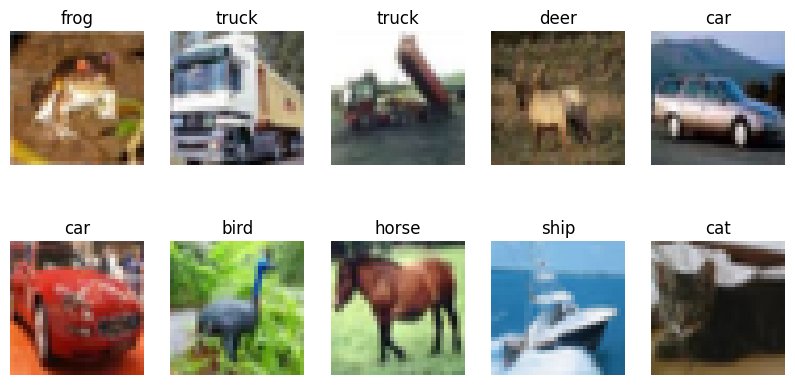

In [ ]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


 Step 6: Compile & Train

In [ ]:
from ast import mod
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2686 - loss: 1.9565 - val_accuracy: 0.4731 - val_loss: 1.4498
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4618 - loss: 1.4846 - val_accuracy: 0.5509 - val_loss: 1.2417
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5258 - loss: 1.3196 - val_accuracy: 0.5922 - val_loss: 1.1585
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5768 - loss: 1.2004 - val_accuracy: 0.6213 - val_loss: 1.0876
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6068 - loss: 1.1302 - val_accuracy: 0.6452 - val_loss: 1.0194
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6273 - loss: 1.0730 - val_accuracy: 0.6448 - val_loss: 1.0247
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6359 - loss: 1.0379 - val_accuracy: 0.6549 - val_loss: 0.9845
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6563 - loss: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


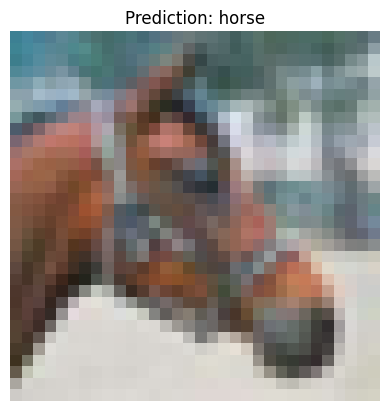

In [ ]:
predictions = model.predict(x_test)
i = 17

plt.imshow(x_test[i])
plt.title(f"Prediction: {class_names[np.argmax(predictions[i])]}")
plt.axis('off')
plt.show()
